# Week 2: Geostrophy and thermal wind balance
### MAQ - 32806, Chiel van Heerwaarden & Imme Benedict, 2016
In this assignment you will investigate whether the large-scale flow is in geostrophic and thermal wind balance. For this, you will use the same ECMWF ERA-Interim data as in last week.
___

### Setting up a Python Basemap and read out 3D fields
We start the tutorial by loading the required Python packages and setting the figure properties.

In [1]:
import numpy as np              # Numpy is the fundamental package for scientific computing in Python.
import netCDF4 as nc            # NetCDF is the data format of the meteorological data that we use.
import matplotlib.pyplot as pl  # Matplotlib is a scientific plotting package.
import matplotlib.colors as cl
from mpl_toolkits.basemap import Basemap # Import the map plotting interface.

# The statement below enforces the plots to be put into this notebook, instead of in their own windows.
%pylab inline
pl.rcParams.update({'font.size': 12})          # Set the standard font size of the plots to 11pt.
pl.rcParams.update({'figure.figsize': [13,6]}) # Set the standard figure size.

Populating the interactive namespace from numpy and matplotlib


___
With the code below, you initialize the world map with the desired coordinates.

In [2]:
lon_start = -150.
lon_end   =   50.
lat_start =   20.
lat_end   =   70.
m = Basemap(llcrnrlon=lon_start,
            llcrnrlat=lat_start,
            urcrnrlon=lon_end,
            urcrnrlat=lat_end,
            projection='mill', resolution='l')

___
Now, you load the data and read out the desired variables from a NetCDF file from the ECMWF ERA-Interim data archive. You are loading a file with data from October 1st, 2015.

In [3]:
nc_file = nc.Dataset("data/era_data.nc", "r")
lat = nc_file.variables["latitude"][:]
lon = nc_file.variables["longitude"][:]
p = nc_file.variables["level"][:]*100
t = -1
p_plot = 50000.
n = abs(p-p_plot).argmin()
nroll = lon.size//2
lon = np.roll(lon, nroll)
lon = np.where(lon>=180., lon-360., lon)

u = np.roll(nc_file.variables["u"][t,:,:,:], nroll, -1)
v = np.roll(nc_file.variables["v"][t,:,:,:], nroll, -1)
z = np.roll(nc_file.variables["z"][t,:,:,:], nroll, -1)
T = np.roll(nc_file.variables["t"][t,:,:,:], nroll, -1)

lons, lats = m(*np.meshgrid(lon, lat))
lonrad, latrad = np.meshgrid(np.pi/180.*lon, np.pi/180.*lat)

### Plotting the magitude of horizontal wind
As a starting point you find below the wind magnitude and geopotential at 500 hPa.

/usr/local/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3542: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  xx = x[x.shape[0]/2,:]


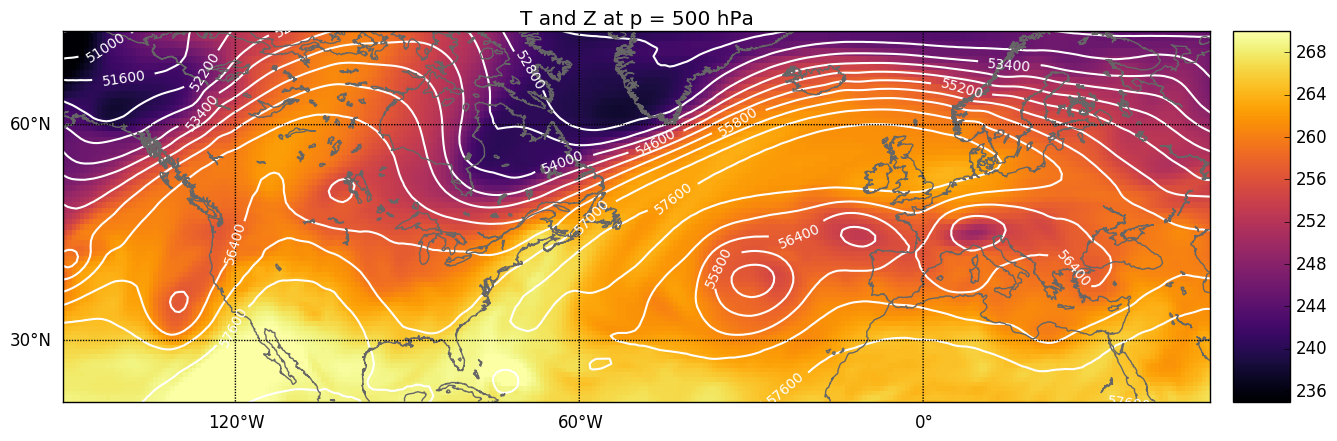

In [4]:
m.pcolormesh(lons, lats, T[n,:,:], cmap=pl.cm.inferno, vmin=235, vmax=270)
m.colorbar()
cz = m.contour(lons, lats, z[n,:,:], 15, colors='w', linewidths=1.5)
pl.clabel(cz, fontsize=10., fmt='%1.0f')
m.drawcoastlines(color='#666666')
# draw parallels.
parallels = np.arange(0.,90,30.)
m.drawparallels(parallels,labels=[1,0,0,0])
# draw meridians
meridians = np.arange(0.,360.,60.)
m.drawmeridians(meridians,labels=[0,0,0,1])
pl.title('T and Z at p = {0:.0f} hPa'.format(p[n] / 100));
pl.tight_layout()

___
### Assignment
In this assignment you are going to verify the existence of geostrophic wind balance and thermal wind balance. The instructions below give you some hints how to proceed. You are free to plot everything that you consider helpful in this task.

#### Geostrophic balance
1. Calculate and plot the geostrophic wind speed at 500 hPa and compare it with the actual wind speed.
2. Where is the atmosphere in geostrophic balance and where not? Discuss the reasons thoroughly.
3. Do the same at 850 and 300 hPa and discuss the differences with the 500 hPa level.

#### Thermal wind balance
1. Derive the thermal wind balance in pressure coordinates. Explain the meaning in detail.
2. Calculate and plot the term that contains the vertical gradient (around 500 hPa) of the zonal geostrophic wind.
3. Calculate and plot the term that contains the meridional gradient of the temperature.
4. Is the atmosphere in thermal wind balance? Where is it and where not?
